In [1]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, accuracy_score
import nltk

nltk.download('punkt')
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re
from deep_translator import GoogleTranslator

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('Data IG Disperinaker.csv')

In [3]:
df

,User ID,Username,Comment ID,Comment,Comment Time,User Homepage,Avatar URL
0,6072569952,dimasyogadyf,"=""17894961578756565""",Info yang sudah datang ke lokasi lanjutan pros...,"5/30/2023, 4:40:43 PM",https://www.instagram.com/dimasyogadyf,https://instagram.fsub6-6.fna.fbcdn.net/v/t51....
1,5848467906,farieshizrian,"=""18011131960654024""",Apa perlu membawa hard copy dokumen2?,"5/31/2023, 12:53:03 AM",https://www.instagram.com/farieshizrian,https://instagram.fsub6-4.fna.fbcdn.net/v/t51....
2,10338102671,tutikwidi12_,"=""17889294629780911""","min, ktp sda bisa ikut kah ?","5/31/2023, 1:04:16 AM",https://www.instagram.com/tutikwidi12_,https://instagram.fsub6-1.fna.fbcdn.net/v/t51....
3,2285406045,l1vvv_,"=""18056011708416757""",Ada yg dtg sesi 2 gak yaaa ??? Bareng yuk,"5/31/2023, 7:40:49 AM",https://www.instagram.com/l1vvv_,https://instagram.fsub6-6.fna.fbcdn.net/v/t51....
4,225369396,irjngp,"=""17866093193931944""",Cuma buat yg KTP Surabaya ta min ?,"5/31/2023, 7:53:03 AM",https://www.instagram.com/irjngp,https://instagram.fsub6-6.fna.fbcdn.net/v/t51....
...,...,...,...,...,...,...,...
86,3170471946,derikar_,"=""18004245916775665""",Ini khusus warga Surabaya ta min? Semisal pend...,"5/26/2023, 1:26:18 PM",https://www.instagram.com/derikar_,https://instagram.fsub6-7.fna.fbcdn.net/v/t51....
87,1930373030,glangrmdhni78,"=""17917977476729708""","kok gabisa login min, padahal nik sama pw suda...","5/26/2023, 4:18:24 PM",https://www.instagram.com/glangrmdhni78,https://instagram.fcjs1-1.fna.fbcdn.net/v/t51....
88,4368065251,syahirah.ramadania,"=""18368092495003246""",Sudah daftar tapi pas dibuat log in kok tidak ...,"5/26/2023, 8:06:02 PM",https://www.instagram.com/syahirah.ramadania,https://instagram.fsub6-7.fna.fbcdn.net/v/t51....
89,59527451470,he.rry5984,"=""17983747529304318""",Gal bisa login,"5/27/2023, 1:45:01 PM",https://www.instagram.com/he.rry5984,https://instagram.fcjs1-1.fna.fbcdn.net/v/t51....


In [4]:
df.shape

(91, 7)

In [5]:
df = df.drop_duplicates(subset='Comment')

In [6]:
df = df.dropna()

In [7]:
df.shape

(91, 7)

In [8]:
komen = df['Comment']

# Preprocessing

**Casefolding**

In [9]:
komen = komen.str.lower()
komen

0     info yang sudah datang ke lokasi lanjutan pros...
1                 apa perlu membawa hard copy dokumen2?
2                          min, ktp sda bisa ikut kah ?
3             ada yg dtg sesi 2 gak yaaa ??? bareng yuk
4                    cuma buat yg ktp surabaya ta min ?
                            ...                        
86    ini khusus warga surabaya ta min? semisal pend...
87    kok gabisa login min, padahal nik sama pw suda...
88    sudah daftar tapi pas dibuat log in kok tidak ...
89                                       gal bisa login
90    untuk kelurahan gimana kak ya ada yang sudah b...
Name: Comment, Length: 91, dtype: object

**Cleansing** </br> 
hastag(#), username(@username), url(https://situs.com), email (nama@domain.com)

In [10]:
def clean_data(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\s+', '', text)
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

komen = komen.apply(clean_data)

In [11]:
komen

0     info yang sudah datang ke lokasi lanjutan pros...
1                   apa perlu membawa hard copy dokumen
2                             min ktp sda bisa ikut kah
3                   ada yg dtg sesi gak yaaa bareng yuk
4                      cuma buat yg ktp surabaya ta min
                            ...                        
86    ini khusus warga surabaya ta min semisal penda...
87    kok gabisa login min padahal nik sama pw sudah...
88    sudah daftar tapi pas dibuat log in kok tidak ...
89                                       gal bisa login
90    untuk kelurahan gimana kak ya ada yang sudah bisa
Name: Comment, Length: 91, dtype: object

**Normalisasi kata** 

In [12]:
file_2  = open("slangwords.txt", "r")
content2 = file_2.read()
slang_words = ast.literal_eval(content2)
file_2.close()

In [13]:
# Menerapkan kamus slang words ke dalam DataFrame
def normalize_comment(comment, slang_dict):
    words = comment.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    normalized_comment = ' '.join(normalized_words)
    return normalized_comment

# Menerapkan normalisasi pada setiap baris komentar
komen = komen.apply(lambda x: normalize_comment(x, slang_words))

In [14]:
komen

0     informasi yang sudah datang ke lokasi lanjutan...
1                   apa perlu membawa hard copy dokumen
2                           admin ktp sda bisa ikut kah
3            ada yang datang sesi tidak yaaa bareng yuk
4                  cuma buat yang ktp surabaya ta admin
                            ...                        
86    ini khusus warga surabaya ta admin semisal pen...
87    kok gabisa login admin padahal nik sama posisi...
88    sudah daftar tapi waktu dibuat log in kok tida...
89                                       gal bisa login
90    untuk kelurahan bagaimana kak iya ada yang sud...
Name: Comment, Length: 91, dtype: object

**Stopword** 

In [15]:
# Mendapatkan daftar stopwords
stop_words = StopWordRemoverFactory().get_stop_words()

# Memastikan 'tidak' benar-benar dihapus dari daftar stopwords
if 'tidak' in stop_words:
    stop_words.remove('tidak')

# Membuat ArrayDictionary baru dengan daftar stopwords yang telah dimodifikasi
new_array = ArrayDictionary(stop_words)

# Membuat StopWordRemover baru dengan ArrayDictionary yang telah dimodifikasi
stop_word_remover_new = StopWordRemover(new_array)

# Fungsi untuk menghapus stopwords dengan mempertahankan kata 'tidak'
def remove_stopwords(text):
    print(f"Sebelum: {text}")
    cleaned_text = stop_word_remover_new.remove(text)  # Fixed this line
    print(f"Sesudah: {cleaned_text}")
    return cleaned_text

# Contoh penggunaan pada kolom 'komen'
komen = komen.apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)

Sebelum: informasi yang sudah datang ke lokasi lanjutan prosesnya bagaimana apa ada hasil
Sesudah: informasi sudah datang lokasi lanjutan prosesnya bagaimana apa hasil
Sebelum: apa perlu membawa hard copy dokumen
Sesudah: apa perlu membawa hard copy dokumen
Sebelum: admin ktp sda bisa ikut kah
Sesudah: admin ktp sda ikut
Sebelum: ada yang datang sesi tidak yaaa bareng yuk
Sesudah: yang datang sesi tidak yaaa bareng yuk
Sebelum: cuma buat yang ktp surabaya ta admin
Sesudah: cuma buat ktp surabaya ta admin
Sebelum: 
Sesudah: 
Sebelum: tolong admine di respon seng komen penting keluh kesah e ikiloh di arahno yaopo seng komen iki kabeh roto suroboyo
Sesudah: admine respon seng komen penting keluh kesah e ikiloh arahno yaopo seng komen iki kabeh roto suroboyo
Sebelum: 
Sesudah: 
Sebelum: oke
Sesudah: oke
Sebelum: ruwet
Sesudah: ruwet
Sebelum: mohon untuk disorot perusahaan outsourcing perusahaan ini menghalangi pengambilan ijasah karyawan yang mengajukan resaign karyawan dalam masa training

In [16]:
komen

0     informasi sudah datang lokasi lanjutan prosesn...
1                   apa perlu membawa hard copy dokumen
2                                    admin ktp sda ikut
3                yang datang sesi tidak yaaa bareng yuk
4                       cuma buat ktp surabaya ta admin
                            ...                        
86    khusus warga surabaya ta admin semisal pendata...
87    kok gabisa login admin padahal nik sama posisi...
88             daftar waktu dibuat log in kok tidak iya
89                                            gal login
90                kelurahan bagaimana kak iya yang bisa
Name: Comment, Length: 91, dtype: object

**Tokenizing** 

In [17]:
tokenized = komen.apply(lambda x:x.split())
tokenized

0     [informasi, sudah, datang, lokasi, lanjutan, p...
1            [apa, perlu, membawa, hard, copy, dokumen]
2                               [admin, ktp, sda, ikut]
3        [yang, datang, sesi, tidak, yaaa, bareng, yuk]
4                [cuma, buat, ktp, surabaya, ta, admin]
                            ...                        
86    [khusus, warga, surabaya, ta, admin, semisal, ...
87    [kok, gabisa, login, admin, padahal, nik, sama...
88    [daftar, waktu, dibuat, log, in, kok, tidak, iya]
89                                         [gal, login]
90         [kelurahan, bagaimana, kak, iya, yang, bisa]
Name: Comment, Length: 91, dtype: object

**Stemming** 

In [18]:
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("C:/Users/lenovo/Downloads/Code/hasilPreprocessing.csv", index=False)
data = pd.read_csv("hasilPreprocessing.csv")

informasi sudah datang lokasi lanjut proses bagaimana apa hasil
apa perlu bawa hard copy dokumen
admin ktp sda ikut
yang datang sesi tidak yaaa bareng yuk
cuma buat ktp surabaya ta admin

admine respon seng komen penting keluh kesah e ikiloh arahno yaopo seng komen iki kabeh roto suroboyo

oke
ruwet
mohon sorot usaha outsourcing usaha halang ambil ijasah karyawan aju resaign karyawan masa training harus bayar denda juta alas sanksi karyawan training wajib kerja jam hari wajib hari minggu kerja jam tidak jamin bpjs sehat bpjs ketengakerjaan gaji tidak sesuai jam kerja karyawan training sungguh tidak masuk akal tidak asuransi apa bagaimana kalau karyawan tinggal lelah siapa mau tanggung jawab bagaimana usaha tidak manusia manusia minta rincian gaji sulit minta salin kontrak kerja tidak beri punya bukti rekam awal pihak hrd ibu intan ibu virgie kepala security bapak suryo bukti rekam
percuma tidak terima sya asli surabaya capek daftar aplikasi tidak panggil aplikasi apa sponsor baca wahai

In [19]:
data

,Comment
0,informasi sudah datang lokasi lanjut proses ba...
1,apa perlu bawa hard copy dokumen
2,admin ktp sda ikut
3,yang datang sesi tidak yaaa bareng yuk
4,cuma buat ktp surabaya ta admin
...,...
86,khusus warga surabaya ta admin misal datang da...
87,kok gabisa login admin padahal nik sama posisi...
88,daftar waktu buat log in kok tidak iya
89,gal login


In [20]:
def translate_to_english(text):
    if pd.isna(text):  # Check if text is NaN
        return ""  # Return empty string if text is NaN
    else:
        translation = GoogleTranslator(source='id', target='en').translate(text)
        return translation

data['komentar_english'] = data['Comment'].apply(translate_to_english)
data

,Comment,komentar_english
0,informasi sudah datang lokasi lanjut proses ba...,"information has arrived, where to continue the..."
1,apa perlu bawa hard copy dokumen,do you need to bring a hard copy of the document?
2,admin ktp sda ikut,Admin KTP is here
3,yang datang sesi tidak yaaa bareng yuk,"Come on, let's come together for the session"
4,cuma buat ktp surabaya ta admin,just make a Surabaya ID card and admin
...,...,...
86,khusus warga surabaya ta admin misal datang da...,"especially for Surabaya residents and admin, f..."
87,kok gabisa login admin padahal nik sama posisi...,How come I can't log in to admin even though N...
88,daftar waktu buat log in kok tidak iya,How come there's no time to register to log in?
89,gal login,gal login


In [21]:
data = data.dropna()

In [22]:
data.shape

(81, 2)

# Labeling

In [23]:
# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Function to get compound score
def get_compound_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Add a new column with compound scores to the DataFrame
data['compound_score'] = data['komentar_english'].apply(get_compound_score)
data

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11748\2172005452.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['compound_score'] = data['komentar_english'].apply(get_compound_score)


,Comment,komentar_english,compound_score
0,informasi sudah datang lokasi lanjut proses ba...,"information has arrived, where to continue the...",0.0000
1,apa perlu bawa hard copy dokumen,do you need to bring a hard copy of the document?,-0.1027
2,admin ktp sda ikut,Admin KTP is here,0.0000
3,yang datang sesi tidak yaaa bareng yuk,"Come on, let's come together for the session",0.0000
4,cuma buat ktp surabaya ta admin,just make a Surabaya ID card and admin,0.0000
...,...,...,...
86,khusus warga surabaya ta admin misal datang da...,"especially for Surabaya residents and admin, f...",0.0000
87,kok gabisa login admin padahal nik sama posisi...,How come I can't log in to admin even though N...,0.5106
88,daftar waktu buat log in kok tidak iya,How come there's no time to register to log in?,-0.2960
89,gal login,gal login,0.0000


In [24]:
# Compound Score Lexicon Based
data.loc[data['compound_score'] < 0 ,'sentiment'] = 'Negatif'
data.loc[data['compound_score'] == 0 ,'sentiment'] = 'Netral'
data.loc[data['compound_score'] > 0 ,'sentiment'] = 'Positif'
data.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11748\225719189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['compound_score'] < 0 ,'sentiment'] = 'Negatif'


,Comment,komentar_english,compound_score,sentiment
0,informasi sudah datang lokasi lanjut proses ba...,"information has arrived, where to continue the...",0.0000,Netral
1,apa perlu bawa hard copy dokumen,do you need to bring a hard copy of the document?,-0.1027,Negatif
2,admin ktp sda ikut,Admin KTP is here,0.0000,Netral
3,yang datang sesi tidak yaaa bareng yuk,"Come on, let's come together for the session",0.0000,Netral
4,cuma buat ktp surabaya ta admin,just make a Surabaya ID card and admin,0.0000,Netral


# Visualisasi

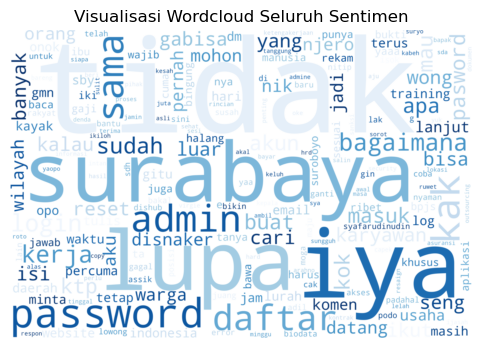

In [25]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(6,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Visualisasi Wordcloud Seluruh Sentimen')
    plt.show()
    
all_words = ' '.join([comments for comments in data['Comment']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

In [26]:
data_positif = data[data['sentiment'] == 'Positif']
data_negatif = data[data['sentiment'] == 'Negatif']
data_netral = data[data['sentiment'] == 'Netral']

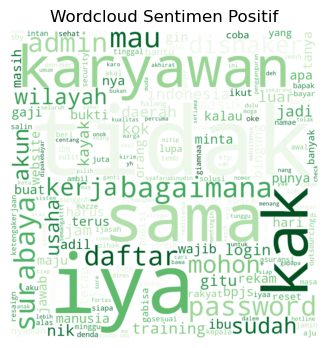

In [27]:
all_words1 = ' '.join([word for word in data_positif["Comment"]])

wordcloud = WordCloud(
    colormap='Greens',
    width=1000,
    height=1000,
    mode = 'RGBA',
    background_color='white').generate(all_words1)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif')
plt.margins(x=0, y=0)
plt.show()

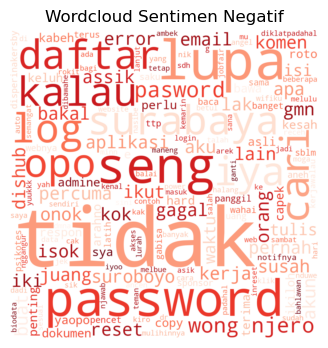

In [28]:
all_words1 = ' '.join([word for word in data_negatif["Comment"]])

wordcloud = WordCloud(
    colormap='Reds',
    width=1000,
    height=1000,
    mode = 'RGBA',
    background_color='white').generate(all_words1)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

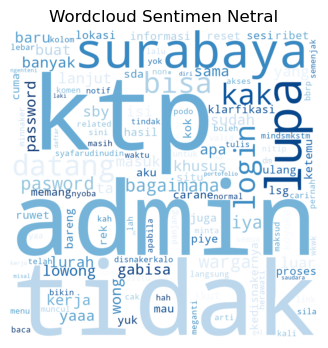

In [29]:
all_words1 = ' '.join([word for word in data_netral["Comment"]])

wordcloud = WordCloud(
    colormap='Blues',
    width=1000,
    height=1000,
    mode = 'RGBA',
    background_color='white').generate(all_words1)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Netral')
plt.margins(x=0, y=0)
plt.show()

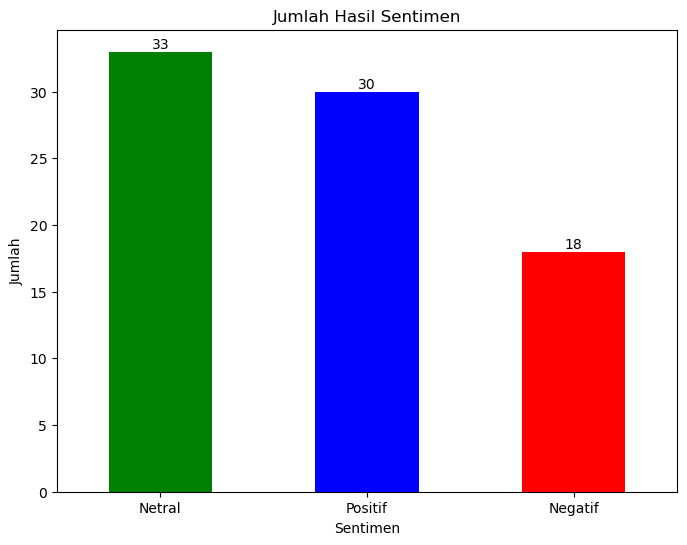

In [30]:
# Hitung jumlah masing-masing sentimen
sentimen_counts = data['sentiment'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = sentimen_counts.plot(kind='bar', color=['green', 'blue', 'red'])

plt.title('Jumlah Hasil Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)  # Mencegah label sumbu x menjadi terlalu bertumpuk

# Add text annotations
for i, count in enumerate(sentimen_counts):
    plt.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.show()

# Klasifikasi Model

In [31]:
#konversi label
def convert_label(label):
    if label == 'Positif':
        return 1
    elif label == 'Negatif':
        return -1
    else:
        return 0

data['Label'] = data['sentiment'].apply(convert_label)
data.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11748\410254997.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['sentiment'].apply(convert_label)


,Comment,komentar_english,compound_score,sentiment,Label
0,informasi sudah datang lokasi lanjut proses ba...,"information has arrived, where to continue the...",0.0000,Netral,0
1,apa perlu bawa hard copy dokumen,do you need to bring a hard copy of the document?,-0.1027,Negatif,-1
2,admin ktp sda ikut,Admin KTP is here,0.0000,Netral,0
3,yang datang sesi tidak yaaa bareng yuk,"Come on, let's come together for the session",0.0000,Netral,0
4,cuma buat ktp surabaya ta admin,just make a Surabaya ID card and admin,0.0000,Netral,0


**TF-IDF**

In [32]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
X_sparse = vectorizer.fit_transform(data['komentar_english'])
y = data['Label']

**Training & Testing Model**

In [33]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y , test_size=0.2, random_state=42)

In [34]:
# Membuat model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Prediksi pada set pengujian
y_pred = model.predict(X_test)

In [36]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.47058823529411764
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.40      0.80      0.53         5
           1       0.57      0.57      0.57         7

    accuracy                           0.47        17
   macro avg       0.32      0.46      0.37        17
weighted avg       0.35      0.47      0.39        17



C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Membuat model SVM
model = SVC()
model.fit(X_train, y_train)

SVC()

In [38]:
# Prediksi pada set pengujian
y_pred = model.predict(X_test)

In [39]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.35294117647058826
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.31      1.00      0.48         5
           1       1.00      0.14      0.25         7

    accuracy                           0.35        17
   macro avg       0.44      0.38      0.24        17
weighted avg       0.50      0.35      0.24        17



C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Definisikan beberapa model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier()
}

# Fungsi untuk melatih dan mengevaluasi model
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Melatih model
        model.fit(X_train, y_train)
        # Melakukan prediksi
        y_pred = model.predict(X_test)
        # Mengevaluasi model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        # Menyimpan hasil
        results[name] = {
            "accuracy": accuracy,
            "classification_report": report
        }
    return results

In [41]:
# Evaluasi semua model
results = evaluate_models(models, X_train, X_test, y_train, y_test)

# Menampilkan hasil
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Classification Report:")
    for label, report in metrics['classification_report'].items():
        if label in ['0', '1', '-1']:  # Menampilkan hanya label
            print(f"  Label {label}:")
            for metric, value in report.items():
                print(f"    {metric}: {value}")
    print("\n")

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\

Model: Logistic Regression
Accuracy: 0.47058823529411764
Classification Report:
  Label -1:
    precision: 0.0
    recall: 0.0
    f1-score: 0.0
    support: 5.0
  Label 0:
    precision: 0.4
    recall: 0.8
    f1-score: 0.5333333333333333
    support: 5.0
  Label 1:
    precision: 0.5714285714285714
    recall: 0.5714285714285714
    f1-score: 0.5714285714285714
    support: 7.0


Model: Support Vector Machine
Accuracy: 0.35294117647058826
Classification Report:
  Label -1:
    precision: 0.0
    recall: 0.0
    f1-score: 0.0
    support: 5.0
  Label 0:
    precision: 0.3125
    recall: 1.0
    f1-score: 0.47619047619047616
    support: 5.0
  Label 1:
    precision: 1.0
    recall: 0.14285714285714285
    f1-score: 0.25
    support: 7.0


Model: Naive Bayes
Accuracy: 0.4117647058823529
Classification Report:
  Label -1:
    precision: 0.0
    recall: 0.0
    f1-score: 0.0
    support: 5.0
  Label 0:
    precision: 0.3333333333333333
    recall: 0.8
    f1-score: 0.47058823529411764
 

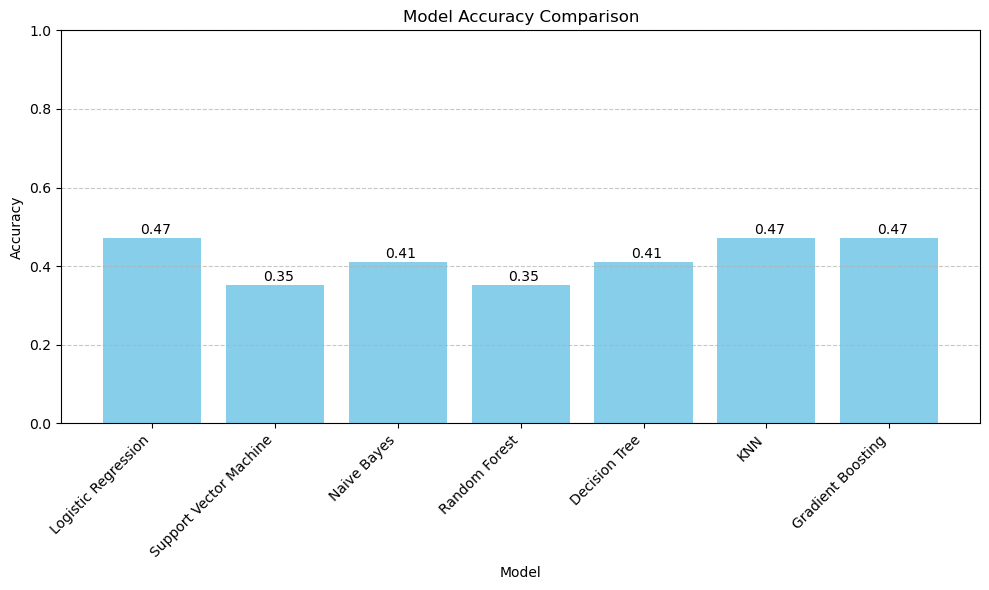

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their accuracies
model_names = [
    "Logistic Regression", 
    "Support Vector Machine", 
    "Naive Bayes", 
    "Random Forest", 
    "Decision Tree", 
    "KNN", 
    "Gradient Boosting"
]
accuracies = [
    0.47058823529411764, 
    0.35294117647058826, 
    0.4117647058823529, 
    0.35294117647058826, 
    0.4117647058823529, 
    0.47058823529411764, 
    0.47058823529411764
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

# Adding accuracy values on top of bars
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.01, round(accuracy, 2))

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
